In [1]:
import requests #Es la que permite interactuar con las APIs en python

# Llamando a APIs usando Python
### Aprendizaje Automático II - CEIA - FIUBA 

Para este hand-on, nos basaremos en este [articulo de Real Python ](https://realpython.com/python-api/)

Al consumir una API con Python, básicamente se necesita de una biblioteca: `requests`. Con ella se puede realizar la mayoría de las acciones necesarias para consumir cualquier API pública.

Esta librería no viene por defecto en Python, por lo que debemos instalarla:

```Bash
python -m pip install requests
```

## Llamando a la primera API usando Python

Llamemos a la primer API pública, para este caso usaremos a [Random User Generator](https://randomuser.me/):

> API de Random User Generator: Esta es una  herramienta para generar datos de usuarios aleatorios. Se puede usar para generar cualquier cantidad de usuarios aleatorios y datos asociados, y también puede especificar género, nacionalidad y muchos otros filtros que pueden ser realmente útiles al probar aplicaciones o, en este caso, APIs.

Todo lo que se necesita para comenzar con la API del Random User Generator es saber con qué URL llamarla. 

Comencemos utilizando a [https://randomuser.me/api/](https://randomuser.me/api/):

In [2]:
requests.get("https://randomuser.me/api/") #Una vez importada, para hacer una consulta se le da una URL, que esta genera datos aleatorios.
# Nos da un 200, que quiere decir que se hizo exitosamente

<Response [200]>

En este ejemplo, hacemos un GET para obtener datos de la URL para la API. Pero no estamos viendo ninguno de los datos devueltos. Lo que se obtiene es un código del estado de respuesta **200**, que en términos de API significa que todo salió bien.

Si se quiere ver el contenido, podemos verlo usando el atributo `.text` del objeto devuelto:

In [3]:
response = requests.get("https://randomuser.me/api/") #Tenemos una respuesta
response.text #Vemos el texto de la respuesta

'{"results":[{"gender":"female","name":{"title":"Ms","first":"Sahana","last":"Shetty"},"location":{"street":{"number":6338,"name":"Dwaraka Nagar"},"city":"Rajahmundry","state":"Lakshadweep","country":"India","postcode":27858,"coordinates":{"latitude":"5.3647","longitude":"107.8574"},"timezone":{"offset":"+6:00","description":"Almaty, Dhaka, Colombo"}},"email":"sahana.shetty@example.com","login":{"uuid":"aefca4c8-31fa-43e1-a3b7-d785c240d246","username":"lazyswan507","password":"raider","salt":"g9Pm3e3o","md5":"2d75405213429a249a96e9ff75a744cd","sha1":"983780666ce4ef2fe46a88e71742b29638e28d4b","sha256":"4e8262651d506bd1ed4c2af510ce345e40390a8d0cb4688f13fdbc7b477dd249"},"dob":{"date":"1976-06-01T14:53:17.503Z","age":47},"registered":{"date":"2009-05-16T23:14:27.579Z","age":14},"phone":"7208123961","cell":"8491122458","id":{"name":"UIDAI","value":"088683000044"},"picture":{"large":"https://randomuser.me/api/portraits/women/76.jpg","medium":"https://randomuser.me/api/portraits/med/women/76.

### Endpoints

La primera información necesaria para consumir una API es la URL de la API, generalmente denominada URL base. La estructura de la URL base no es diferente de las URL que utiliza para navegar en Google, YouTube o Facebook, aunque normalmente contiene la palabra api. Esto no es obligatorio, sólo una regla general.

Si se intenta ingresar a alguna de las APIs como la de [Twitter](https://api.twitter.com), podemos ver que nos devuelve un error de autenticación. Esto se debe a que las API a veces requieren pasos de autenticación antes de poder usarlas.

Para avanzar, usemos otra API fácilmente accesible [The Cat API](https://thecatapi.com/):

> The Cat API: esta API es un  buen ejemplo de una API bien hecha con excelente documentación. Con esta, se puede buscar las diferentes razas de gatos y algunas imágenes.

A continuación, utilizando The Cat API, realizemos una solicitud básica para ver en qué se diferencia de la API de Random User Generator:

In [4]:
response = requests.get("https://api.thecatapi.com/") #No siempre tiene adelante la palabra API.
response.text
#Si queremos usar una API que no es publica debemos autenticarnos antes.
#The Cat API, es otra de libre acceso
#Llamamos a las url base.

'{"message":"The Cat API","version":"1.3.9"}'

En este caso, al llamar a la URL base, aparece un mensaje genérico que dice `"The Cat API"`. Esto se debe a que se está llamando a la URL base, que normalmente se usa para información muy básica sobre una API, no para datos reales.

Llamar a la URL base por sí solo no es muy útil, pero ahí es donde los **endpoints** resultan útiles. Un **endpoint** es una parte de la URL que especifica qué recurso se desea obtener. Las API bien documentadas suelen contener una referencia de API, lo cual es prácticamente necesario para saber exactamente qué endpoints y recursos tiene una API y cómo usarlos. **Documenten sus APIs**

The API Cat nos presenta su [documentación](https://developers.thecatapi.com/). Ahí se encuentra el endpoint `/breeds` que se puede utilizar para recuperar todos los recursos de raza disponibles.

In [5]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
response.text
#Información de distintos tipos de gatos
#Si se usan APIs publicas se recomienda que sean con https

'[{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinian_(cat)","hypoallerg

Una cosa que es necesario saber sobre los **endpoints** es la diferencia entre `http://` y `https://`. HTTPS es la versión cifrada de HTTP, lo que hace que todo el tráfico entre el cliente y el servidor sea mucho más seguro. Al consumir API públicas, lo ideal es evitar enviar información privada o confidencial a los endpoints con `http://` y utilizar solo aquellas API que proporcionen una URL base `https://` segura.

### Request y Response

Todas las interacciones entre un cliente (en este caso, el notebook) y una API se dividen en un `request` y una `response`:

- Los `requests` contienen datos relevantes sobre la llamada de solicitud, como la URL base, el endpoint, el método utilizado, los encabezados, etc.
- Los `responses` contienen datos relevantes devueltos por el servidor, incluidos los datos o el contenido, el código de estado y los encabezados.

Usando The Cat API nuevamente, profundicemos un poco más en lo que hay exactamente dentro de los objetos `request` y `response`:

In [6]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
response
# Se puedne agregar filtros.
# En el response tenemos los datos del servidor

<Response [200]>

In [7]:
response.status_code

200

In [8]:
response.text
#Vamos a ver lo de reci

'[{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinian_(cat)","hypoallerg

In [9]:
response.headers

{'x-dns-prefetch-control': 'off', 'x-frame-options': 'SAMEORIGIN', 'strict-transport-security': 'max-age=15552000; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'vary': 'Origin', 'pagination-count': '67', 'pagination-page': '0', 'pagination-limit': '1000', 'access-control-expose-headers': 'Pagination-Count, Pagination-Page, Pagination-Limit', 'content-type': 'application/json; charset=utf-8', 'x-response-time': '2ms', 'X-Cloud-Trace-Context': '6f82f0061818806231d9d1381e4afb05', 'Date': 'Sat, 06 Apr 2024 05:42:26 GMT', 'Server': 'Google Frontend', 'Content-Length': '76734'}

In [10]:
response.request

<PreparedRequest [GET]>

In [11]:
# Veamos el request
request = response.request

In [12]:
request.url
#Podemos averiguar cual fue la URL y el endpoint

'https://api.thecatapi.com/v1/breeds'

In [13]:
request.path_url

'/v1/breeds'

In [14]:
request.method
#Podemos ver el método

'GET'

In [15]:
request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

Aquí se ha accedido a algunos de los atributos más importantes que están disponibles para los objetos de `request` y `response`.

Si se desea profundizar en los diferentes atributos, visite la [documentación de Mozilla](https://developer.mozilla.org/en-US/docs/Web/HTTP/Messages)

### Código de estados

Como vimos en clase, los APIs nos devuelven un código de estado. Este código es lo primero que se debe buscar. No indica si el `request` fue exitoso, si falta datos, credenciales, etc. 

Se puede verificar el estado de una `response` usando los atributos `.status_code` y `.reason`:

In [16]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
response
#Simpre lo primero que debo hacer es checkar el código de la respuesta

<Response [200]>

In [17]:
response.status_code

200

In [18]:
response.reason

'OK'

La solicitud devuelve 200, por lo que puede considerarse una solicitud exitosa. Pero veamos una solicitud fallida:

In [19]:
response = requests.get("https://api.thecatapi.com/v1/raza")
response

<Response [404]>

In [20]:
response.status_code

404

In [21]:
response.reason
#Nos se encontró el endpoint, el método solicitado.
#Podemos ver que hicmos algo mal en al consulta 

'Not Found'

El endpoint `/raza` no existe, por lo que la API devuelve un código de estado `404 Not Found`.

Se puede utilizar estos códigos de estado para ver rápidamente si se necesita cambiar la solicitud o revisar la documentación nuevamente para detectar errores tipográficos o faltantes.

### Encabezado HTTP

Los encabezados HTTP pueden definir algunos parámetros que rigen las `request` y `response`:

- `Accept`: Qué tipo de contenido puede aceptar el cliente:
- `Content-Type`: Con qué tipo de contenido responderá el servidor
- `User-Agent`: Qué software utiliza el cliente para comunicarse con el servidor
- `Server`: Qué software utiliza el servidor para comunicarse con el cliente
- `Authentication`: Quién llama a la API y qué credenciales tiene

Hay muchos otros encabezados que pueden encontrarse al inspeccionar un `request` o `response`. 

Para inspeccionar los encabezados de una `response`, se puede usar `response.headers`:

In [22]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers
#Trae la información de una sola raza

{'x-dns-prefetch-control': 'off', 'x-frame-options': 'SAMEORIGIN', 'strict-transport-security': 'max-age=15552000; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'vary': 'Origin', 'content-type': 'application/json; charset=utf-8', 'x-response-time': '3ms', 'X-Cloud-Trace-Context': '468af30e1e717281aac0f1055244d5be', 'Date': 'Sat, 06 Apr 2024 05:42:28 GMT', 'Server': 'Google Frontend', 'Content-Length': '1041'}

Para hacer lo mismo con los encabezados de `request`, se puede usar a `response.request.headers` ya que `request` es un atributo del objeto `response`:

In [23]:
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

En este caso, como no especificamos ningún encabezado, Python envío el de por defecto.

### Encabezados propios

Otro estándar con el que uno se puede encontrar al consumir una API es el uso de encabezados personalizados. Generalmente comienzan con X-, pero eso no es un requisito. Los desarrolladores de API suelen utilizar encabezados personalizados para enviar o solicitar información personalizada adicional a los clientes.

Se puede usar un diccionario para definir encabezados y enviarlos junto con su solicitud usando el parámetro `headers` de `.get()`.

Por ejemplo, supongamos que se desea enviar algún ID de solicitud al servidor API y sabe que puede hacerlo usando `X-Request-Id`:

In [24]:
headers = {"X-Request-Id": "<my-request-id>"}
response = requests.get("https://example.org", headers=headers)
response.request.headers
#X- es para que sea fácilmente identificables.
#Creo el encabezado y el valor que voy a enviar. Y cuando haga la solicitud a la API le agrego el get y el header. Al parámetros header le agregamos el nuestro
#Hacemos la consulta y vemos los header que se generan por defecto y al final vemos el header que se le agrega personalizado.
#El más importnate es Content-Type

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'X-Request-Id': '<my-request-id>'}

Una respuesta puede tener muchos tipos útiles de encabezados, pero uno de los más importantes es `Content-Type`, que define el tipo de contenido devuelto en la respuesta.

### Content-Type

Hoy en día, la mayoría de las API utilizan JSON como tipo de contenido predeterminado, pero es posible que necesites utilizar una API que devuelva XML u otros tipos de medios, como imágenes o vídeos. En ese caso, el tipo de contenido será diferente.

Si vemos uno de los ejemplos anteriores usando The Cat API y se inspecciona el encabezado `Content-Type`, vemos que se definió como `application/json`:

In [25]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")

'application/json; charset=utf-8'

El encabezado devuelve el tipo específico de contenido, que en este caso es `application/json`. También devuelve el encoding.

Veamos otra API, para encontrar otro tipo de respuestas:

> Image-Charts API: Esta es una API útil que se puede usar para crear gráficos en diferentes tamaños.

En este caso, usando [Image-Charts API](https://www.image-charts.com), el tipo de contenido ya no es `application/json`, sino que está definido como `image/png`:

In [26]:
url = "https://image-charts.com/chart?chs=700x125&cht=ls&chd=t:23,15,28"
response = requests.get(url)
response
# No empieza con API.
# Tenemos la respuesta que no da un 200

<Response [200]>

In [27]:
response.headers.get("Content-Type")
# Nos llega una imagen 

'image/png'

En este caso, el encabezado `Content-Type` indica que el contenido devuelto es una imagen PNG. 

El encabezado `Content-Type` es muy importante para saber cómo manejar una respuesta y qué hacer con su contenido. Hay cientos de otros tipos de [contenido aceptables](https://www.iana.org/assignments/media-types/media-types.xhtml), incluidos audio, vídeo y más.


### Contenido de respuesta

Como vimos, el tipo de contenido que encuentre en la respuesta de la API variará según el encabezado `Content-Type`. Para leer correctamente el contenido de la respuesta de acuerdo con los diferentes encabezados de tipo de contenido, la librería `requests` viene con un par de atributos de respuesta diferentes que puede usar para manipular los datos de `response`:

- `.text`: Devuelve el contenido de la respuesta en formato Unicode.
- `.content`: Devuelve el contenido de la respuesta en bytes.

Ya usamos el atributo `.text`, pero para algunos tipos específicos de datos, como imágenes y otros datos no textuales, usar `.content` suele ser un mejor enfoque, incluso si devuelve un resultado muy similar a `.text`:

In [28]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")

'application/json; charset=utf-8'

In [29]:
response.content

b'{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They\xe2\x80\x99re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinian_(cat)",

Como se puede ver, no hay una gran diferencia entre `.content` y `.text`, aunque la `b` indica que el valor devuelto consta de bytes sin formato en lugar de una cadena.

Al observar el encabezado `Content-Type` de la respuesta, se puede ver que el contenido es `application/json`, un objeto JSON. Para ese tipo de contenido, la librería `requests` incluye un método `.json()` específico que puede usarse para convertir inmediatamente la respuesta de bytes de API en una estructura de datos de Python:

In [30]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")

'application/json; charset=utf-8'

In [31]:
response.json()
#Cuando el content-type es un json lo vemos de forma más ordenada, es como un diccionario

{'weight': {'imperial': '7  -  10', 'metric': '3 - 5'},
 'id': 'abys',
 'name': 'Abyssinian',
 'cfa_url': 'http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx',
 'vetstreet_url': 'http://www.vetstreet.com/cats/abyssinian',
 'vcahospitals_url': 'https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian',
 'temperament': 'Active, Energetic, Independent, Intelligent, Gentle',
 'origin': 'Egypt',
 'country_codes': 'EG',
 'country_code': 'EG',
 'description': 'The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.',
 'life_span': '14 - 15',
 'indoor': 0,
 'lap': 1,
 'alt_names': '',
 'adaptability': 5,
 'affection_level': 5,
 'child_friendly': 3,
 'dog_friendly': 4,
 'energy_level': 5,
 'grooming': 1,
 'health_issues': 2,
 'intelligence': 5,
 'shedding_level': 2,
 'social_needs': 5,
 'stranger_friendly': 5,
 'vocalisation': 1,
 'experimental': 0,
 'hairless': 0,
 'natural': 1,
 'rare': 0,
 'rex': 0,
 'suppressed_ta

In [32]:
response.json()["name"]

'Abyssinian'

Como se puede ver, después de ejecutar `response.json()`, se obtiene un diccionario que puede usarse como se usaría cualquier otro diccionario en Python.

Ahora, volviendo a la API Image-Charts, intentemos recuperar el gráfico de líneas:

In [33]:
url = "https://image-charts.com/chart?chs=700x125&cht=ls&chd=t:23,15,28"
response = requests.get(url)
response

<Response [200]>

In [34]:
response.headers.get("Content-Type")

'image/png'

In [35]:
response.content
# Tenemos el contendio en bytes

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x00}\x08\x02\x00\x00\x00\xcf\xf3\',\x00\x00\x0c\xbeIDATx\xda\xec\xda\xbb\x8a"A\x14\x06\xe0f\x03\x8d5\x13s\xdf\xa6\xfa\x11D\x05\x15A\x91\xaeNT\x94\r\xc4v\x03\xdb\x07\xf0\x82\x18\xa9\xef\xa1xi;6\xd7\x16\x051P\xbc%\xd2[\xecAid\x9d\x19\x06\x87\t\xe6\xff"\x7fN\xd5\t\x8c\x0e\xa7K\xb2\x01\x00\x00\x00>@\xc2_\x00\x00\x00\x00\x18\x1a\x00\x00\x00\xbe\xd6\xf9|f\x8cM&\x13\xfb\x8b\x1d\x8fG\xc6\x98a\x18\xf6{\xc6\xe3\xb18y\xb9\\\xecW\xfb%\x01\x00\x00\xc0g\xb9\\\xaeB\xa1\x10\x08\x04\xa4\x1f\x00\x9b\x06\x00\x00\x80\x17l\x1a\x9a\xcd&s\xd0u\x9d\x0e\xac\xd7\xebH$\xc2\x18S\x14\xe5Y\xccd2\xf6\xff,\x97KQ\xcdf\xb3\xd7\xeb\x956\rB\xb5Z\xa5\xeaj\xb5\xa2V\x9cs\x11\xf7\xfb}2\x99l\xb5Z\xb4i\xb8\xaf%\xfa\xfd>\xc5\xe9t\xea\xec\x1c\x0e\x87s\xb9\x9c\xe8L\xad(\x8a\xdf\x87\xc3\x819\xc8\xb2,\xaa\xf8<\x01\x00\x00\xf0\xca\xa1!\x1e\x8f\x0f\x87C\x11;\x9dN\xb9\\\xaeT*T\xa5\xa8(\xca\xe9t\x12\xb1\xdb\xedj\x9av\x8f\xedv\xbbX,\xd2\x0cq\xb8\x11\x17iJ\xa0\xc3\x9csg\xd4u\x

En este caso, debido a que se está solicitando una imagen, `.content` no es muy útil. Sin embargo, sabemos que se trata de una imagen PNG, por lo que podemos intentar almacenarla en un archivo:

In [36]:
with open("./chart.png", mode="wb") as file:
    file.write(response.content)
#Vamos a grabar el conteindo de la respuesta

La imagen que obtuvimos es esta:

![imagen de la API](./chart.png)

### Métodos HTTP

Vimos que al llamar a una API, existen algunos métodos diferentes, también llamados verbos, que se puede utilizar para especificar qué acción se desea ejecutar. 

Cuando solo se consumen datos usando API, normalmente se usan solicitudes `GET`.

Con `requests` se pueden realizar los otros tipos de acciones sin problemas:

In [37]:
requests.post("https://api.thecatapi.com/v1/breeds/abys")
# Vemos que no acepta el POST el endpoint, porque no está permitido

<Response [405]>

In [38]:
requests.get("https://api.thecatapi.com/v1/breeds/abys")

<Response [200]>

In [39]:
requests.put("https://api.thecatapi.com/v1/breeds/abys")
# Vemos que no acepta el PUT el endpoint, porque no está permitido

<Response [405]>

In [40]:
requests.delete("https://api.thecatapi.com/v1/breeds/abys")
# Vemos que no acepta el DELETE el endpoint, porque no está permitido

<Response [405]>

En este ejemplo, la mayoría de ellos devuelven un código de estado `405 Method Not Allowed`. Esto se debe a que no todos los endpoints permitirán métodos `POST`, `PUT` o `DELETE`. Especialmente cuando se leen datos utilizando API públicas, la mayoría de las API solo permiten solicitudes `GET` ya que no puede crear ni cambiar los datos existentes.

### Parámetros de consulta

A veces, cuando uno llama a una API, obtienes una gran cantidad de datos que no se necesitan. Por ejemplo, al llamar al endpoint `/breeds` de the Cat API, se obtienen mucha información sobre una raza determinada. Pero en algunos casos, es posible que se desee extraer sólo cierta información sobre una raza determinada. Ahí es donde entran los parámetros de consulta.

En el mundo de las API, los parámetros de consulta son filtros que puede enviar con el `request` para limitar aún más las respuestas. Por ejemplo, volviendo a la API de Random User Generator:

In [41]:
requests.get("https://randomuser.me/api/").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Assia', 'last': 'Van Holland'},
   'location': {'street': {'number': 4530, 'name': 'Brinkhorst'},
    'city': 'Meerkerk',
    'state': 'Zuid-Holland',
    'country': 'Netherlands',
    'postcode': '8095 XS',
    'coordinates': {'latitude': '33.4954', 'longitude': '13.2875'},
    'timezone': {'offset': '+9:30', 'description': 'Adelaide, Darwin'}},
   'email': 'assia.vanholland@example.com',
   'login': {'uuid': '1d1e738e-3a00-4313-9bcc-cfe76440b18e',
    'username': 'smallrabbit965',
    'password': 'santos',
    'salt': 'OddmhogT',
    'md5': '890e5ead21cb6d2035ebcfd54c3ff059',
    'sha1': 'd6d4bb4c6029bd41df435116f9418826f968c2f6',
    'sha256': 'fe71e1517d9d82d0cf6ae5ad4c9539a2ef2c862d1e6c4ce7c2049faede1fb8c8'},
   'dob': {'date': '1994-10-17T18:47:58.014Z', 'age': 29},
   'registered': {'date': '2011-03-13T00:55:10.507Z', 'age': 13},
   'phone': '(0026) 216306',
   'cell': '(06) 82328157',
   'id': {'name': 'BS

Sin embargo, supongamos que se desea generar específicamente solo usuarios femeninos al azar. Según la documentación, puedes usar el parámetro de consulta `gender=` para eso:

In [42]:
requests.get("https://randomuser.me/api/?gender=female").json()
# Le indicamos que queremos género female

{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Geruza', 'last': 'Novaes'},
   'location': {'street': {'number': 4326, 'name': 'Rua Onze '},
    'city': 'Colombo',
    'state': 'Tocantins',
    'country': 'Brazil',
    'postcode': 74985,
    'coordinates': {'latitude': '-73.9361', 'longitude': '-47.2720'},
    'timezone': {'offset': '-10:00', 'description': 'Hawaii'}},
   'email': 'geruza.novaes@example.com',
   'login': {'uuid': 'a21673fb-9ec3-4a99-a1c4-d1164b0eaa40',
    'username': 'smallelephant885',
    'password': 'alexis',
    'salt': 'L4WnPMJN',
    'md5': '5a54e6da1a3c2707caeef4b2346959af',
    'sha1': '5a75acdbe0daf2bd8610d80192a0b998dfd664db',
    'sha256': '9dec5a6549cd791b83606dc2ae09b6a3bfe844c7e5ed7b057aa220f8866e12c2'},
   'dob': {'date': '1950-06-17T16:12:57.585Z', 'age': 73},
   'registered': {'date': '2004-03-17T08:50:45.045Z', 'age': 20},
   'phone': '(27) 0866-3013',
   'cell': '(23) 9070-8165',
   'id': {'name': 'CPF', 'value': '539.239.34

Ahora si queremos crear usuarios de género femenino y de Alemania. agregamos el parámetro de consulta `nat=` para eso:

In [43]:
requests.get("https://randomuser.me/api/?gender=female&nat=de").json()
#La argegamos la nacionalidad ahora en el filtro, con un &

{'results': [{'gender': 'female',
   'name': {'title': 'Mrs', 'first': 'Elsbeth', 'last': 'Burkart'},
   'location': {'street': {'number': 7623, 'name': 'Schützenstraße'},
    'city': 'Dissen am Teutoburger Wald',
    'state': 'Sachsen',
    'country': 'Germany',
    'postcode': 83878,
    'coordinates': {'latitude': '-22.6628', 'longitude': '-83.5940'},
    'timezone': {'offset': '-12:00', 'description': 'Eniwetok, Kwajalein'}},
   'email': 'elsbeth.burkart@example.com',
   'login': {'uuid': '170ce3cd-f261-472f-a135-d15225e852f1',
    'username': 'bluefrog847',
    'password': 'allmine',
    'salt': '8izfDi8k',
    'md5': '964e9f828a7cb90a60621b573d64428f',
    'sha1': 'b4795e63f9f11bb5a21cd4fee9da94ed23c79f2c',
    'sha256': 'e82e6bbebaad0d1d19615417b68219f484f0a5ac3c492b7d242f1cfd4ee953e2'},
   'dob': {'date': '1948-08-08T00:04:38.289Z', 'age': 75},
   'registered': {'date': '2009-07-31T03:47:27.443Z', 'age': 14},
   'phone': '0139-5319089',
   'cell': '0174-9890302',
   'id': {'nam

Al utilizar parámetros de consulta, se puede comenzar a obtener datos más específicos de una API.

Para evitar tener que reconstruir la URL una y otra vez, se puede usar el atributo `params` para enviar un diccionario de todos los parámetros de consulta para agregar a una URL:

In [44]:
query_params = {"gender": "female", 
                "nat": "de"}
#Podemos hacer un diccionario para que quede más ordenado
requests.get("https://randomuser.me/api/", params=query_params).json()
#Y se pone params

{'results': [{'gender': 'female',
   'name': {'title': 'Mrs', 'first': 'Louise', 'last': 'Escher'},
   'location': {'street': {'number': 2192, 'name': 'Im Winkel'},
    'city': 'Witten',
    'state': 'Sachsen-Anhalt',
    'country': 'Germany',
    'postcode': 49187,
    'coordinates': {'latitude': '-79.7237', 'longitude': '45.5886'},
    'timezone': {'offset': '+5:30',
     'description': 'Bombay, Calcutta, Madras, New Delhi'}},
   'email': 'louise.escher@example.com',
   'login': {'uuid': '2ab36fd6-9712-4d99-bc3f-7084b5419419',
    'username': 'bluewolf502',
    'password': 'roses',
    'salt': 'LEek1MJ8',
    'md5': 'd708b39e9437db01415ce8cf7808a8e9',
    'sha1': 'dd939d040224a19d9c56255ade314a94e747f86a',
    'sha256': '9fbd81b48157a84b3faf063ec77f4f6f0059af7f2452b48b6574c2c66687169a'},
   'dob': {'date': '1947-08-01T04:15:09.686Z', 'age': 76},
   'registered': {'date': '2013-03-09T18:48:45.475Z', 'age': 11},
   'phone': '0732-0520685',
   'cell': '0173-6698206',
   'id': {'name': '

La mayoría de las API tendrán algún tipo de parámetros de consulta que puede utilizarse para filtrar datos. 

### Autenticación

Aunque muchas API públicas son gratuitas y completamente públicas, hay aún más API disponibles detrás de alguna forma de autenticación.

Los enfoques de autenticación van desde los más simples y directos, como los que utilizan claves API o autenticación básica, hasta técnicas mucho más complejas y seguras, como [OAuth](https://es.wikipedia.org/wiki/OAuth).

Normalmente, llamar a una API sin credenciales o con las incorrectas devolverá un código de estado `401 Unauthorized` o `403 Forbidden`.

#### Claves API

El nivel de autenticación más común es la clave API. Estas claves se utilizan para identificar como usuario o cliente de API y para rastrear el uso de la API. Las claves API normalmente se envían como un encabezado de solicitud o como un parámetro de consulta.

Para este ejemplo, se probará [NASA’s Mars Rover Photo API](https://data.nasa.gov/Space-Science/Mars-Rover-Photos-API/929k-jizu/about_data) y se obtendrá fotografías tomadas el 1 de julio de 2020. Para fines de prueba, se puede utilizar la clave API `DEMO_KEY` que la NASA proporciona de forma predeterminada. 

In [45]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
query_params = {"earth_date": "2020-10-25"}
response = requests.get(endpoint, params=query_params)
response
# Vemos que tenenmos un error

<Response [403]>

In [46]:
response.json()
# Nos falta la calve de autenticación

{'error': {'code': 'API_KEY_MISSING',
  'message': 'No api_key was supplied. Get one at https://api.nasa.gov:443'}}

In [47]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
api_key = "DEMO_KEY"
# Queremos ver la fecha de la foto y un parámetro que se llama api_key, con el que hacemos la consulta
query_params = {"api_key": api_key, "earth_date": "2020-10-25"}
response = requests.get(endpoint, params=query_params)
response

<Response [200]>

In [48]:
response.json()

{'photos': [{'id': 770298,
   'sol': 2922,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02922/opgs/edr/fcam/FLB_656897870EDR_F0822188FHAZ00337M_.JPG',
   'earth_date': '2020-10-25',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active',
    'max_sol': 4102,
    'max_date': '2024-02-19',
    'total_photos': 695670,
    'cameras': [{'name': 'FHAZ', 'full_name': 'Front Hazard Avoidance Camera'},
     {'name': 'NAVCAM', 'full_name': 'Navigation Camera'},
     {'name': 'MAST', 'full_name': 'Mast Camera'},
     {'name': 'CHEMCAM', 'full_name': 'Chemistry and Camera Complex'},
     {'name': 'MAHLI', 'full_name': 'Mars Hand Lens Imager'},
     {'name': 'MARDI', 'full_name': 'Mars Descent Imager'},
     {'name': 'RHAZ', 'full_name': 'Rear Hazard Avoidance Camera'

Entre mucha información, esta respuesta nos devuelve esta imagen:

![NASA photo](https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02922/opgs/edr/fcam/FLB_656897870EDR_F0822188FHAZ00337M_.JPG)

#### OAuth

Otro estándar muy común en la autenticación API es OAuth. Veamos solo muy poco de este tema para familiarizarnos.

OAuth está presente cuando en diferentes plataformas nos dan la posibilidad de `Iniciar sesión` con o `Continuar con` y podemos usar algún autentificador, ese es el punto de partida de un flujo de OAuth. ¿Qué pasa cuando tocamos ese botón (supongamos que podemos iniciar sesión con Google?

1. La aplicación le pedirá a la API de Google que inicie un flujo de autenticación. Para hacer esto, la aplicación enviará su ID de aplicación (client_id) y una URL (redirect_uri) para redirigir al usuario después de un éxito o un error.
2. Uno será redirigido al sitio web de Google y se te pedirá que inicies sesión con tus credenciales. La aplicación no verá ni tendrá acceso a estas credenciales. Este es el beneficio más importante de OAuth.
3. Google te mostrará todos los datos que la aplicación solicita de tu perfil y te pedirá que aceptes o rechaces compartir esos datos.
4. Si acepta darle acceso a la aplicación a sus datos, será redirigido nuevamente a la aplicación, una vez que haya iniciado sesión.

Al pasar por el paso 4, Google le proporcionará a la aplicación una credencial especial (`access_token`) que puede usar repetidamente para recuperar su información. Este token de inicio de sesión de Google específico es válido durante sesenta días, pero otras aplicaciones pueden tener períodos de vencimiento diferentes. 

Ahora, desde un punto de vista más técnico, esto es lo que se necesita saber al consumir API mediante OAuth:

1. Se debe crear una aplicación que tenga un ID (`app_id` o `client_id`) y un secreto (`app_secret` o `client_secret`).
2. Se debe tener una URL de redireccionamiento (`redirect_uri`), que la API utilizará para enviarle información.
3. Obtendrá un código como resultado de la autenticación, que deberá intercambiar por un token de acceso.

Existen algunas variaciones de lo anterior, pero en términos generales, la mayoría de los flujos de OAuth tendrán pasos similares a estos.

### Paginación

Enviar una gran cantidad de datos entre clientes y servidores tiene un precio: el ancho de banda. Para asegurarse de que los servidores puedan hacer frente a muchas solicitudes, las API suelen utilizar paginación.

En términos muy simples, la paginación es el acto de dividir grandes cantidades de datos en múltiples partes más pequeñas. Esto normalmente se maneja con la ayuda de parámetros de consulta, principalmente los dos siguientes:

- Un atributo de página que define qué página estás solicitando actualmente
- Un atributo de tamaño que define el tamaño de cada página.

Los nombres de los parámetros de consulta específicos pueden variar mucho según los desarrolladores de API, pero el concepto es el mismo. 

Al volver a utilizar The Cat API, en la búsqueda de imágenes contamos con el parámetro `limit` que define la cantidad de imagenes de gatos por `request` y el parámetro `page` permite paginar a través de múltiples resultados:

In [49]:
url = "https://api.thecatapi.com/v1/images/search"

for page in range(0, 10): #De la página 0 a la 10
    
    querystring = {"limit": "1", #Cantidad de registros que nos van a devolver en cada consulta, le pedimos un registro por página
                   "page": page} #

    response = requests.get(url, params=querystring)
    print(response.json())

[{'id': 'aon', 'url': 'https://cdn2.thecatapi.com/images/aon.jpg', 'width': 667, 'height': 1000}]
[{'id': 'vm', 'url': 'https://cdn2.thecatapi.com/images/vm.jpg', 'width': 453, 'height': 550}]
[{'id': 'dbt', 'url': 'https://cdn2.thecatapi.com/images/dbt.gif', 'width': 333, 'height': 200}]
[{'id': 'd6s', 'url': 'https://cdn2.thecatapi.com/images/d6s.jpg', 'width': 1544, 'height': 1024}]
[{'id': '5ju', 'url': 'https://cdn2.thecatapi.com/images/5ju.jpg', 'width': 540, 'height': 405}]
[{'id': '9tq', 'url': 'https://cdn2.thecatapi.com/images/9tq.jpg', 'width': 560, 'height': 721}]
[{'id': 'MTg3OTA3Mg', 'url': 'https://cdn2.thecatapi.com/images/MTg3OTA3Mg.jpg', 'width': 3648, 'height': 2736}]
[{'id': 'ctHlkAH3L', 'url': 'https://cdn2.thecatapi.com/images/ctHlkAH3L.jpg', 'width': 1080, 'height': 1350}]
[{'id': 'MTY4NDM4Mg', 'url': 'https://cdn2.thecatapi.com/images/MTY4NDM4Mg.jpg', 'width': 500, 'height': 331}]
[{'id': 'd56', 'url': 'https://cdn2.thecatapi.com/images/d56.jpg', 'width': 4288, 

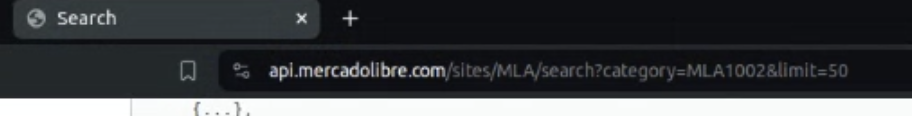

Ejemplo de como funciona con mercado libre, le pedí 50 televisores. Si le pido más, me da un bad_request.

### Limitación de tasa

Dado que las API son públicas y cualquiera puede usarlas, las personas con malas intenciones a menudo intentan abusar de ellas. Para evitar este tipo de ataques, las API utilizan una técnica llamada limitación de tasa, que restringe la cantidad de solicitudes que los usuarios pueden realizar en un período de tiempo determinado.

Algunas API pueden bloquear la IP o la clave API si excede el límite de tasa definido con demasiada frecuencia.

### Llamando la API de la implementación de amq2-service-ml

Por último, llamemos a la API del modelo que se implementó en [amq2-service-ml](https://github.com/facundolucianna/amq2-service-ml). En este caso vamos a usar el modelo implementado y hacer un `request` para obtener una salida del mismo:

In [50]:
endpoint = "http://localhost:8800/"
response = requests.get(endpoint)
response
# Si levantamos la imagen de la implementacion en el trabajo final
# En ese puerto se tiene al API por defecto

<Response [200]>

In [51]:
response.json()
# Nos va a devolver el mensaje de la API.


{'message': 'Welcome to the Heart Disease Detector API'}

El modelo se encuentra en el endpoint `predict`. Dado que queremos que el modelo nos de su predicción, vamos a usar `POST` en vez de `GET`.

Necesitamos enviarles los features del modelo mediante un payload o contenido en el cuerpo de la solicitud HTTP. 

Cuando se envía una solicitud POST, normalmente incluye datos en el cuerpo de la solicitud, que pueden estar en varios formatos, como JSON, XML, datos de formulario, etc., según los requisitos de la aplicación. Este API, pide los datos en formato JSON, por lo que debemos convertir el cuerpo a enviar en una cadena de caracteres JSON: 

In [52]:
endpoint = "http://localhost:8800/predict"
# Si además usamos el endpoint predict, todas las features

data = {
    "features": {
        "age": 67,
        "ca": 3,
        "chol": 286,
        "cp": 4,
        "exang": 1,
        "fbs": 0,
        "oldpeak": 1.5,
        "restecg": 2,
        "sex": 1,
        "slope": 2,
        "thal": 3,
        "thalach": 108,
        "trestbps": 160
    }
}

response = requests.post(endpoint, json=data)
# Se envía un json con esos datos
response

<Response [200]>

In [53]:
response.json()
# Va a tener una salida que es una predicción del modelo

{'int_output': True, 'str_output': 'Heart disease detected'}